### Vanilla Saliency


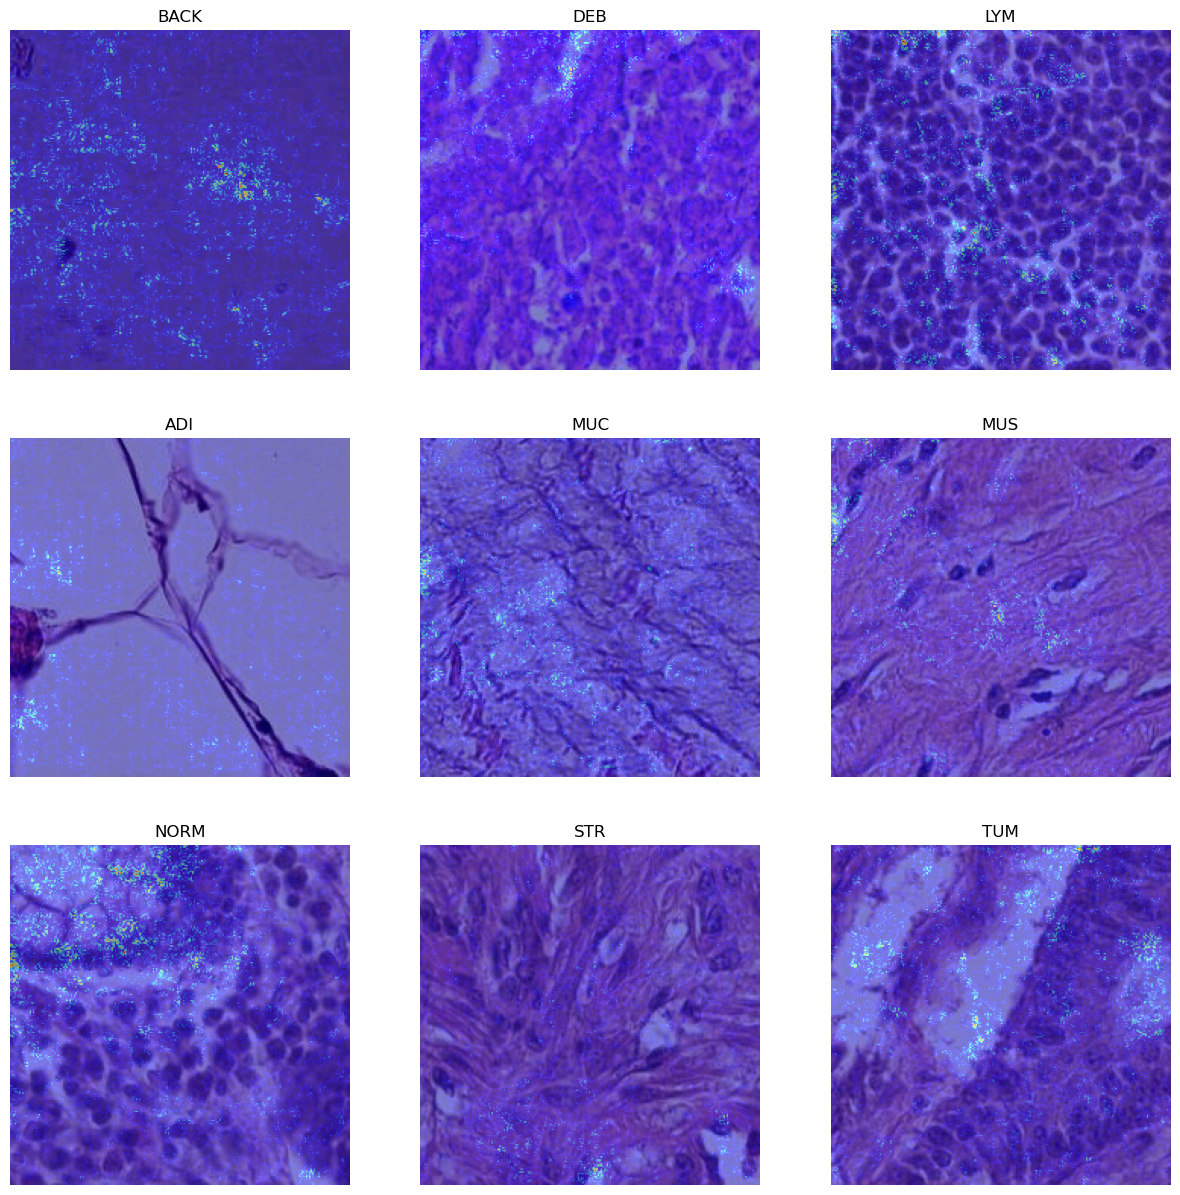

In [23]:
from keras.models import load_model
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras import backend as K

from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
from tf_keras_vis.utils.scores import CategoricalScore

import matplotlib.pyplot as plt

import numpy as np


model = load_model('../models/resnet_50_10e.h5')

replace2linear = ReplaceToLinear()

img_back = load_img('../CRC-VAL-HE-7K/BACK/BACK-TCGA-ANNAGVAD.tif.jpg', target_size=(224, 224))
img_deb = load_img('../CRC-VAL-HE-7K/DEB/DEB-TCGA-ALLMHHRT.tif.jpg', target_size=(224, 224))
img_lym = load_img('../CRC-VAL-HE-7K/LYM/LYM-TCGA-ARAGGTET.tif.jpg', target_size=(224, 224))
img_adi = load_img('../CRC-VAL-HE-7K/ADI/ADI-TCGA-AESDELDR.tif.jpg.jpg', target_size=(224, 224))
img_muc = load_img('../CRC-VAL-HE-7K/MUC/MUC-TCGA-AFKKMVFN.tif.jpg', target_size=(224, 224))
img_mus = load_img('../CRC-VAL-HE-7K/MUS/MUS-TCGA-AYFQQECY.tif.jpg', target_size=(224, 224))
img_norm = load_img('../CRC-VAL-HE-7K/NORM/NORM-TCGA-APSNTVTS.tif.jpg', target_size=(224, 224))
img_str = load_img('../CRC-VAL-HE-7K/STR/STR-TCGA-CATEHPML.tif.jpg', target_size=(224, 224))
img_tum = load_img('../CRC-VAL-HE-7K/TUM/TUM-TCGA-AKHKQFVK.tif.jpg', target_size=(224, 224))

images = np.asarray([
    np.array(img_back),
    np.array(img_deb),
    np.array(img_lym),
    np.array(img_adi),
    np.array(img_muc),
    np.array(img_mus),
    np.array(img_norm),
    np.array(img_str),
    np.array(img_tum)
])
image_titles = ['BACK', 'DEB', 'LYM', 'ADI', 'MUC', 'MUS', 'NORM', 'STR', 'TUM']


score = CategoricalScore([0, 1, 2, 3, 4, 5, 6, 7, 8])

saliency = Saliency(
    model,
    model_modifier=replace2linear,
    clone=True
)

X = preprocess_input(images)

saliency_map = saliency(score, X)

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
for i in range(3):
    for j in range(3):
        axes[i, j].imshow(images[i*3+j])
        axes[i, j].imshow(saliency_map[i*3+j], cmap='jet', alpha=0.5)
        axes[i, j].set_title(image_titles[i*3+j])
        axes[i, j].axis('off')
plt.show()
